# Amazon Movie Recommendations



### Imports

In [ ]:
import numpy as np
import pandas as pd
import gzip
import json

Mounted at /content/drive


In [ ]:
### Source : http://jmcauley.ucsd.edu/data/amazon/index_2014.html

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
      yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
      df[i] = d
      i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('../reviews_Movies_and_TV_5.json.gz')

In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4.0,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3.0,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3.0,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5.0,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4.0,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1.0,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5.0,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5.0,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5.0,can't Wait!,1405987200,"07 22, 2014"


In [ ]:
# df reviewers with >= 100 reviews
# 1. To reduce run time 
# 2. Get the reviewers with a significant amount of reviews

counts = df['reviewerID'].value_counts()
df = df[df['reviewerID'].isin(counts[counts >= 100].index)]



In [ ]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
13,A1GHUN5HXMHZ89,0005019281,"C. A. Luster ""The Rook""","[0, 0]",The first time I saw &#34;An American Christma...,5.0,An American Christmas Carol,1387670400,"12 22, 2013"
34,AZB4CQ9JZSUQB,0005019281,Eric Pregosin,"[3, 4]","When this first aired in 1979, I enjoyed it so...",5.0,A Christmas Carol to be remembered,1012176000,"01 28, 2002"
35,A22GJ2SRENMZS0,0005019281,"F. Sisti ""ftt meditator""","[0, 0]",Winkler does a little over-the-top in his role...,4.0,Dated TV Flic,1388966400,"01 6, 2014"
104,A2JP0URFHXP6DO,0005019281,Tim Janson,"[9, 13]",For some reason I always thought this film was...,3.0,FONZIE PLAYS SCROOGE....AAAYYYYYY!!!!,1102377600,"12 7, 2004"
112,AQ8DU6XVA3USJ,0005119367,"Alejandra Vernon ""artist & illustrator""","[102, 106]",Though this interpretation of Joseph's life ha...,5.0,a man of character and faith,1077321600,"02 21, 2004"
...,...,...,...,...,...,...,...,...,...
1697513,A14Z0Q1DU6CBJJ,B00LH9ROKM,Chris Kennison,"[1, 2]",Based on the real-life accounts of former New ...,3.0,Se7en meets the Exorcist,1404432000,"07 4, 2014"
1697514,A3TYC8T6W81DDB,B00LH9ROKM,C. Sawin,"[1, 2]",Writer and director Scott Derrickson was able ...,4.0,Grotesquely satisfying,1404345600,"07 3, 2014"
1697517,A3F9VH8916IA40,B00LH9ROKM,Jonathan &#34;Jimmy Dean&#34; Lane: libertari...,"[1, 3]",Jump scares are the fart jokes of horror movie...,1.0,Cheap and Lazy,1404604800,"07 6, 2014"
1697519,AER15RIMV8E6D,B00LH9ROKM,Pumpkin Man,"[0, 0]","This is the 1st horror film of 2014 I've seen,...",4.0,Creepy & Chilling!!!,1405296000,"07 14, 2014"


# Collaborative Recommendations with Scikitlearn's Surprise Library

### SVD, KNN Models,

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8 MB 6.7 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630101 sha256=ccdca80e49f9c612ec0134a967333b1178c86761254d3b9fdfd7505cc394c3df
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import SVD
from surprise.prediction_algorithms.knns import KNNWithMeans, KNNBasic
from surprise import NormalPredictor
from surprise import SlopeOne
from surprise import BaselineOnly

from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold

from surprise import Reader
from surprise import Dataset

# https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html
# https://surprise.readthedocs.io/en/stable/getting_started.html

In [ ]:
df.rename(columns = {'overall':'raw_ratings', 'reviewerID':'userID', 'asin':'itemID'}, inplace = True)

DF = pd.DataFrame(columns=['userID', 'itemID', 'raw_ratings'])
DF['raw_ratings'] = pd.Series(df.raw_ratings)
DF['itemID'] = pd.Series(df.itemID)
DF['userID'] = pd.Series(df.userID)



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
reader = Reader(rating_scale=(1,5))

data = Dataset.load_from_df(DF, reader)

## Parameter Tuning

In [ ]:
# random_pred.NormalPredictor	Algorithm predicting a random rating based on the distribution of the training set, which is assumed to be normal.

# No parameters

In [ ]:
# baseline_only.BaselineOnly Algorithm predicting the baseline estimate for given user and item.

# No parameters

In [ ]:
# knns.KNNBasic	A basic collaborative filtering algorithm.
param_grid = {'k': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print("RMSE")
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])
# Results
# 1.0520457149526121
# {'k': 15}

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

results_df

In [ ]:
# knns.KNNWithMeans	A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
param_grid = {'k': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])
# Results
# 0.9723698722896262
# {'k': 50}

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

results_df

In [ ]:
# matrix_factorization.SVD The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.When baselines are not used, this is equivalent to Probabilistic Matrix Factorization [salakhutdinov2008a] (see note below)..
param_grid = {'n_epochs': [15, 20], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.9540729000163266
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}


In [ ]:
results_df = pd.DataFrame.from_dict(gs.cv_results)

results_df

,split0_test_rmse,split1_test_rmse,split2_test_rmse,split3_test_rmse,split4_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,0.970116,0.977841,0.977099,0.975605,0.976686,0.975469,0.002773,6,14.473880,3.525193,0.830630,0.548061,"{'n_epochs': 15, 'lr_all': 0.002, 'reg_all': 0.4}",15,0.002,0.4
1,0.979655,0.987411,0.986337,0.985605,0.986387,0.985079,0.002772,8,12.612019,0.570719,0.538829,0.035660,"{'n_epochs': 15, 'lr_all': 0.002, 'reg_all': 0.6}",15,0.002,0.6
2,0.953131,0.960088,0.959870,0.958325,0.959420,0.958167,0.002590,2,12.231120,0.064159,0.820014,0.559410,"{'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.4}",15,0.005,0.4
3,0.963829,0.971106,0.970427,0.969505,0.970267,0.969027,0.002648,4,12.295117,0.152649,0.836885,0.485036,"{'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.6}",15,0.005,0.6
4,0.964065,0.971614,0.970934,0.969689,0.970498,0.969360,0.002720,5,16.273874,0.203118,0.626524,0.041274,"{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.4}",20,0.002,0.4
5,0.974076,0.981758,0.980702,0.979998,0.980728,0.979452,0.002746,7,16.079942,0.277806,0.836828,0.433282,"{'n_epochs': 20, 'lr_all': 0.002, 'reg_all': 0.6}",20,0.002,0.6
6,0.949091,0.955866,0.955821,0.954310,0.955277,0.954073,0.002553,1,16.315479,0.268572,0.522261,0.021196,"{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.4}",20,0.005,0.4
7,0.960129,0.967108,0.966745,0.965628,0.966507,0.965223,0.002594,3,15.903690,0.130370,0.877719,0.459832,"{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.6}",20,0.005,0.6


## K-Fold Cross Validation

In [ ]:
DF

,userID,itemID,raw_ratings
13,A1GHUN5HXMHZ89,0005019281,5.0
34,AZB4CQ9JZSUQB,0005019281,5.0
35,A22GJ2SRENMZS0,0005019281,4.0
104,A2JP0URFHXP6DO,0005019281,3.0
112,AQ8DU6XVA3USJ,0005119367,5.0
...,...,...,...
1697513,A14Z0Q1DU6CBJJ,B00LH9ROKM,3.0
1697514,A3TYC8T6W81DDB,B00LH9ROKM,4.0
1697517,A3F9VH8916IA40,B00LH9ROKM,1.0
1697519,AER15RIMV8E6D,B00LH9ROKM,4.0


In [ ]:
def kfoldCV(data, algo):
  rmse_list = []

  # define a cross-validation iterator
  kf = KFold(n_splits=10)

  print("======================================")
  print(algo)
  for trainset, testset in kf.split(data):

      # train and test algorithm
      algo.fit(trainset)
      predictions = algo.test(testset)

      # Compute Root Mean Squared Error
      rmse_list.append(accuracy.rmse(predictions, verbose=False))

  print('RMSE Average:', str(np.mean(rmse_list)))
  print("======================================")
  return rmse_list



In [ ]:
algos = {
    "SVD" : SVD(n_epochs=20, lr_all=0.005, reg_all=0.4),                # Selected hyperparameters after GridSearchCV
    "KNNWithMeans" : KNNWithMeans(k=50),   # Selected k=50 after GridSearchCV
    "KNNBasic" : KNNBasic(k=15),       # Selected k=15 after GridSearchCV
    "BaselineOnly" : BaselineOnly(),       # No hyperparameters
    "NormalPredictor" : NormalPredictor()     # No hyperparameters
}

algos_Scores = {
    "SVD" : [],
    "KNNWithMeans" : [],
    "KNNBasic" : [],
    "BaselineOnly" : [],
    "NormalPredictor" : []
}

for algo, surprise in algos.items():
  algos_Scores[algo] = kfoldCV(data, surprise)


RMSE Average: 0.950981450338524
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE Average: 0.9658041290843778
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing simil

In [ ]:
algos_Scores 

{'BaselineOnly': [0.9417596668143373,
  0.9389973966654316,
  0.9423343676705337,
  0.9407298679384902,
  0.9443115555012868,
  0.9406661340609921,
  0.9377337923215333,
  0.9377424914505248,
  0.9408025596214885,
  0.9348850881813489],
 'KNNBasic': [1.0474148816873021,
  1.0476679058314144,
  1.0386799562510758,
  1.0380427683857136,
  1.0417005329760616,
  1.0324996202337904,
  1.0416844525347098,
  1.0448489139503117,
  1.0476649194368264,
  1.047946557770029],
 'KNNWithMeans': [0.9642483183597924,
  0.9600528336589905,
  0.9747139815565485,
  0.9668913870538242,
  0.9663005196889521,
  0.9658862125177408,
  0.962738495091258,
  0.9638039628966443,
  0.9724711304481356,
  0.9609344495718903],
 'NormalPredictor': [1.5164766369156544,
  1.5059530725668984,
  1.5098380372025446,
  1.5127044345874807,
  1.5186301639378599,
  1.5178337205670858,
  1.5079126121057962,
  1.5136867566712326,
  1.521633926984991,
  1.5183784432070238],
 'SVD': [0.946962744896799,
  0.9541900113737606,
  0.94

In [ ]:
import matplotlib.pyplot as plt


def plot_score_comparison(scores, metric):
    """
    plot_score_comparison plots the score comparison of the K-Fold Cross Validation.
    We can visually compare the performance of each model.
    
    Input :  scores            Dictionary: {model name : list of scores for the model}
             metric            String: metric used
    """
    fig = plt.figure(figsize=(10,5))
    fig.suptitle(metric + ' Comparison using K-Fold Cross-Validation')
    ax = fig.add_subplot(111)
    for i, (k, v) in enumerate(scores.items()):
        ax.scatter(i * np.ones(len(v)) + 1, v, label=k, alpha=0.5)
    for i in range(5):
        ax.plot(range(1,len(scores)+1), [scores[k][i] for k in scores.keys()], c='k', alpha=0.2)
    ax.boxplot(scores.values())
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.show()

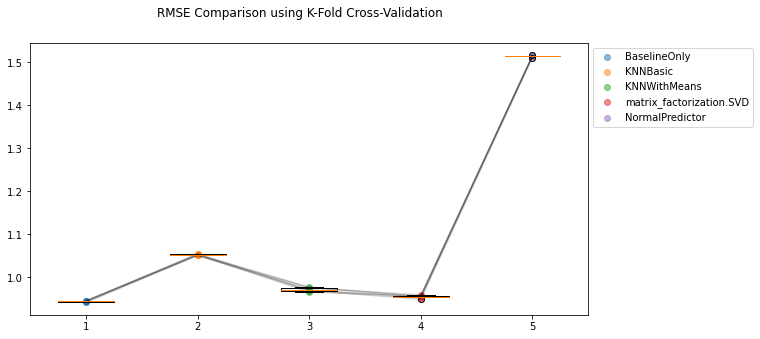

In [ ]:
plot_score_comparison(algos_Scores, 'RMSE')